# Single Membership Data with Outliers

In this notebook, we show that RTKM performs competitively with existing methods on single-membership data with outliers. 



In [1]:
from RTKM import *
from ClusteringMethods import *
from AccuracyMeasures import *

import numpy as np
import pandas as pd
import csv
from sklearn.decomposition import PCA


# WBC Dataset

Load the Breast Cancer Wisconsin dataset.  This dataset contains 699 instances of tumors with 9 numerical attributes each. All of the instances are classified as either benignor malignant, of which we treat the latter as outliers.

In [2]:
wbc = pd.read_csv("datasets/breast-cancer-wisconsin.data", 
                   names = ['id', 'feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9', 'class'],
                   delimiter = ',', quoting = 3)
wbc.replace('?', 0, inplace = True)

data = wbc[['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9']].to_numpy().astype(float)

classification = wbc['class'].to_numpy().astype(int)
point_classification = np.where(classification == 2, 1, 0)
outlier_classification = np.where(classification == 4, 1, 0)

true_labels = np.vstack((point_classification, outlier_classification))


Plot the dataset against its top two principle components.

Text(0.5, 1.0, 'WBC Data top 2 principal components')

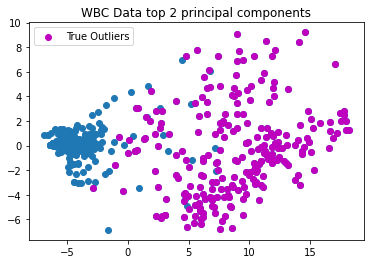

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(data)
Xnew = pca.transform(data)
Xnew = Xnew.T

outliers = np.where(true_labels[1] == 1)
plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,outliers], Xnew[1,outliers], c = 'm', label = 'True Outliers')
plt.legend()
plt.title('WBC Data top 2 principal components')


In [4]:
data = data.T

# Run RTKM



 Number of true positives:  [447, 226] 

 Number of false positives :  [15, 11] 

 Number of true negatives:  [226, 447] 

 Number of false negatives:  [11, 15] 

 F1 scores for each cluster:  [0.97173913 0.94560669] 

 Average F1 score:  0.958672912497726 

 me score:  0.06671385894862325


Text(0.5, 1.0, 'PALM Trimmed for K-Means Clustering on WBC')

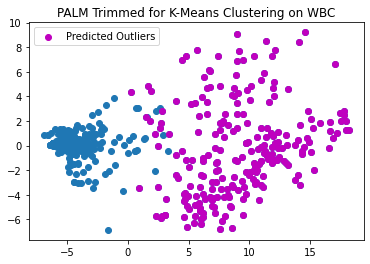

In [5]:
RTKM_WBC = RTKM(data)
RTKM_WBC.perform_clustering(k=1, percent_outliers = 0.34, max_iter = 500)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels, pred_clusters = RTKM_WBC.weights, pred_outliers = RTKM_WBC.outliers, membership_option = 'single')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score: ', me)

pred_clusters, pred_outliers = RTKM_WBC.return_clusters()

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
plt.legend()
plt.title('PALM Trimmed for K-Means Clustering on WBC')




# Run KMOR



 Number of true positives:  [447, 226] 

 Number of false positives :  [15, 11] 

 Number of true negatives:  [226, 447] 

 Number of false negatives:  [11, 15] 

 F1 scores for each cluster:  [0.97173913 0.94560669] 

 Average F1 score:  0.958672912497726 

 me score: 0.06671385894862325


Text(0.5, 1.0, 'PALM Trimmed for K-Means Clustering on WBC')

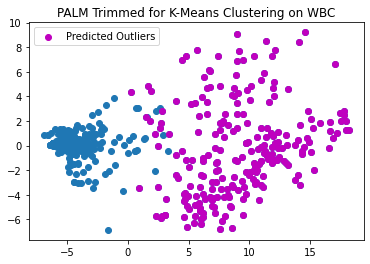

In [6]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=1, percent_outliers= 0.34, gamma = 1)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels, pred_clusters = pred_labels_KMOR, pred_outliers = pred_outliers_KMOR, membership_option = 'single')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

pred_outliers = np.where(pred_outliers_KMOR == 0)[0]
plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
plt.legend()
plt.title('PALM Trimmed for K-Means Clustering on WBC')



# Run NEO

    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.340, betaN: 238


 Number of true positives:  [458, 0] 

 Number of false positives :  [241, 0] 

 Number of true negatives:  [0, 458] 

 Number of false negatives:  [0, 241] 

 F1 scores for each cluster:  [0.79170268 0.        ] 

 Average F1 score:  0.3958513396715644 

 me score:  1.0


Text(0.5, 1.0, 'PALM Trimmed for K-Means Clustering on WBC')

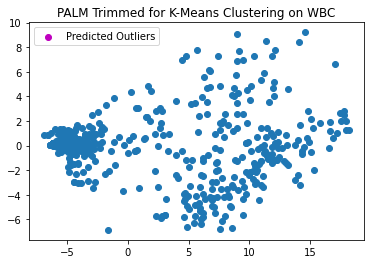

In [7]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m',
                                             k=1, percent_outliers=0.34, sigma = 0, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels, pred_clusters = pred_labels_NEO, pred_outliers = pred_outliers_NEO, membership_option = 'single')


print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores), 
     '\n\n me score: ', me)

pred_outliers = np.where(pred_outliers_NEO == 0)[0]
plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
plt.legend()
plt.title('PALM Trimmed for K-Means Clustering on WBC')




# Run Xmeans and G Means

In [10]:
from pyclustering.cluster.xmeans import xmeans
m,n = data.shape
k = 1

init_centers = data[:, np.random.choice(n, k)]
xmeans_instance = xmeans(data.T, init_centers.T, 2)
xmeans_instance.process()

clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

plt.figure()
for cluster in clusters:
    plt.scatter(Xnew[0,cluster], Xnew[1,cluster])
plt.title('k=2')
plt.savefig('xmeansk=2')

    

# pred_labels = np.zeros(n)
# for i, cluster in enumerate(clusters):
#     pred_labels[cluster] = i
    
# weight_mat = label_to_weight_mat(pred_labels, n, 2)
# pred_outliers = weight_mat[-1]
# pred_outliers = np.where(pred_outliers==1, 0, 1)

# tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels, pred_clusters = weight_mat[:-1], pred_outliers = pred_outliers, membership_option = 'single')


# print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
#       '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
#       '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores), 
#      '\n\n me score: ', me)

NameError: name 'data' is not defined

In [11]:
from pyclustering.cluster.gmeans import gmeans

gmeans_instance = gmeans(data.T, repeat=10).process()
clusters = gmeans_instance.get_clusters()
centers = gmeans_instance.get_centers()

plt.figure()
for cluster in clusters:
    plt.scatter(Xnew[0,cluster], Xnew[1,cluster])
# plt.savefig('gmeans')
    
# print(len(centers))

NameError: name 'data' is not defined

# Bisecting K Means

In [12]:
from bisecting_k_means import bisecting_k_means

fin_labels = bisecting_k_means(X=data.T, k=2)

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:], c = fin_labels)
# plt.savefig('bisecting')

weight_mat = label_to_weight_mat(fin_labels, n, 2)
pred_outliers = weight_mat[-1]
pred_outliers = np.where(pred_outliers==1, 0, 1)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels, pred_clusters = weight_mat[:-1], pred_outliers = pred_outliers, membership_option = 'single')


print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores), 
     '\n\n me score: ', me)

NameError: name 'data' is not defined

# Test sensitivty of all three methods to alpha

In [5]:
alpha_vals = np.linspace(.25, .45, 10)

f1_avg_rtkm, f1_avg_kmor, f1_avg_neo, me_avg_rtkm, me_avg_kmor, me_avg_neo, \
min_rtkm, max_rtkm, min_kmor, max_kmor, min_neo, max_neo = sensitivity_to_alpha(data, k=1, kmor_gamma= 1, 
                                                                                neo_sigma = 0, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m',
                                                                                alpha_vals= alpha_vals, iterations= 50, true_clusters=true_labels,
                                                                                membership_option= 'single')
    
    

    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175


***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0


***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699


***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


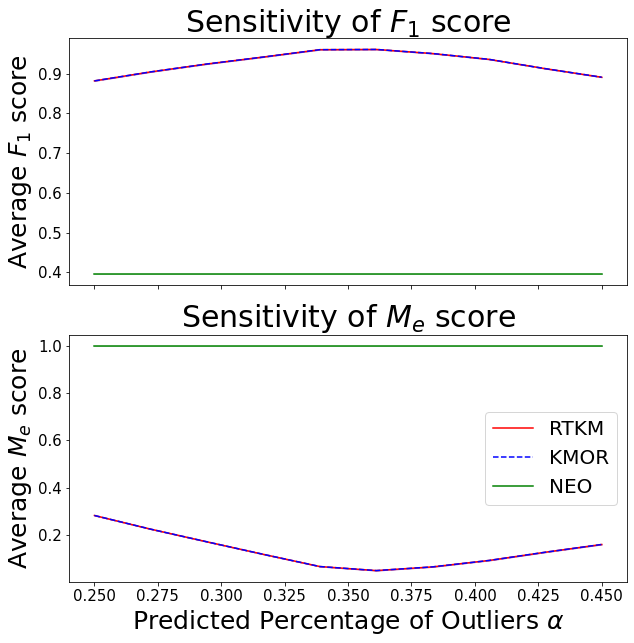

In [14]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (10,10))
ax1.plot(alpha_vals, f1_avg_rtkm, c='r', label = 'RTKM')
ax1.plot(alpha_vals, f1_avg_kmor, 'b--', label = 'KMOR')
ax1.plot(alpha_vals, f1_avg_neo, label = 'NEO', c = 'g')
ax1.fill_between(alpha_vals, min_rtkm[0,:], max_rtkm[0,:], color = 'r', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor[0,:], max_kmor[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_neo[0,:], max_neo[0,:], color = 'g', alpha = 0.2)
ax1.set_title('Sensitivity of $F_1$ score')
ax1.set_ylabel('Average $F_1$ score')
ax1.yaxis.label.set_fontsize(25)
ax1.title.set_fontsize(30)
ax1.tick_params(axis='y', labelsize=15)
# ax1.legend()

ax2.plot(alpha_vals, me_avg_rtkm, c='r', label = 'RTKM')
ax2.plot(alpha_vals, me_avg_kmor, 'b--', label = 'KMOR')
ax2.plot(alpha_vals, me_avg_neo, label = 'NEO', c = 'g')
ax2.fill_between(alpha_vals, min_rtkm[1,:], max_rtkm[1,:], color = 'r', alpha = 0.2)
ax2.fill_between(alpha_vals, min_kmor[1,:], max_kmor[1,:], color = 'b', alpha = 0.2)
ax2.fill_between(alpha_vals, min_neo[1,:], max_neo[1,:], color = 'g', alpha = 0.2)
ax2.set_title('Sensitivity of $M_e$ score')
ax2.set_ylabel('Average $M_e$ score')
ax2.set_xlabel('Predicted Percentage of Outliers ' r'$\alpha$')
ax2.xaxis.label.set_fontsize(25)
ax2.yaxis.label.set_fontsize(25)
ax2.title.set_fontsize(30)
ax2.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.legend(fontsize = 20)


plt.savefig('wbc.pdf', format = 'pdf')

# Shuttle Dataset

In [11]:
shuttle = pd.read_csv('datasets/shuttle.trn', 
                      names = ['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9', 'class'],
                     delimiter = ' ')

data = shuttle[['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9', 'class']].to_numpy().astype(float)
label = shuttle['class'].to_numpy().astype(int)


In [12]:
data = data.T
m,n = data.shape

In [13]:
temp_label = np.zeros(len(label))
np.copyto(temp_label, label[:])
unique_vals = np.unique(temp_label)

val = []
counts = []
for i in range(len(unique_vals)):
    counts.append(len(np.where(temp_label == unique_vals[i])[0]))
    val.append(counts[i]/len(temp_label))
print('percentage of points in cluster', val)
print('percent in top 3 clusters', val[0] + val[4] + val[3])
print('number of points in each cluster', counts)
print('number of outliers', counts[1] + counts[2] + counts[5] + counts[6])

true_outliers = np.zeros(1)
for i in [2,3,6,7]:
    true_outliers = np.hstack((true_outliers, np.where(temp_label==i)[0]))
true_outliers = (true_outliers[1:]).astype(int)

temp_label[true_outliers] = 6

k = 3

new_val = 0
true_label_vec = np.zeros(n)
for val in np.unique(temp_label):
    true_label_vec = np.where(temp_label == val, new_val, true_label_vec)
    new_val +=1
    
true_label = np.zeros((k+1, n))
true_label[true_label_vec.astype(int), np.arange(n)] = 1


percentage of points in cluster [0.7840919540229885, 0.0008505747126436781, 0.0030344827586206895, 0.1551264367816092, 0.05650574712643678, 0.00013793103448275863, 0.0002528735632183908]
percent in top 3 clusters 0.9957241379310344
number of points in each cluster [34108, 37, 132, 6748, 2458, 6, 11]
number of outliers 186


# Run RTKM

In [14]:
RTKM_shuttle = RTKM(data)
RTKM_shuttle.perform_clustering(k=3, percent_outliers = 0.05, max_iter = 500)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_label, pred_clusters = RTKM_shuttle.weights, pred_outliers = RTKM_shuttle.outliers, membership_option = 'single')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score: ', me)




 Number of true positives:  [25493, 2935, 0, 118] 

 Number of false positives :  [2900, 1379, 8548, 2127] 

 Number of true negatives:  [6492, 35373, 32494, 41187] 

 Number of false negatives:  [8615, 3813, 2458, 68] 

 F1 scores for each cluster:  [0.81576295 0.53064545 0.         0.09707939] 

 Average F1 score:  0.3608719479729249 

 me score:  0.3688746683157037


# Run KMOR

In [15]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=3, percent_outliers= 0.05, gamma = 1)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_label, pred_clusters = pred_labels_KMOR, pred_outliers = pred_outliers_KMOR, membership_option = 'single')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)



 Number of true positives:  [25571, 2926, 0, 122] 

 Number of false positives :  [2943, 1346, 8539, 2053] 

 Number of true negatives:  [6449, 35406, 32503, 41261] 

 Number of false negatives:  [8537, 3822, 2458, 64] 

 F1 scores for each cluster:  [0.81667784 0.53103448 0.         0.10334604] 

 Average F1 score:  0.3627645918547795 

 me score: 0.347335237524805


# Run NEO

In [16]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=3, percent_outliers=0.05, sigma = 0, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_label, pred_clusters = pred_labels_NEO, pred_outliers = pred_outliers_NEO, membership_option = 'single')


print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores), 
     '\n\n me score: ', me)

    _pyeval at line 57 column 30

***** iteration: 1, objective: 30972509.948587
***** iteration: 2, objective: 27735268.162740
***** iteration: 3, objective: 26538805.230366
***** iteration: 4, objective: 25964519.011515
***** iteration: 5, objective: 25595649.042002
***** iteration: 6, objective: 25324090.266117
***** iteration: 7, objective: 25140531.870798
***** iteration: 8, objective: 24964461.691793
***** iteration: 9, objective: 24828377.916666
***** iteration: 10, objective: 24711269.573639
***** iteration: 11, objective: 24658292.286641
***** iteration: 12, objective: 24633707.950181
***** iteration: 13, objective: 24601680.682593
***** iteration: 14, objective: 24593676.402869
***** iteration: 15, objective: 24592271.482567
***** iteration: 16, objective: 24591998.296786
***** iteration: 17, objective: 24591884.079082
***** iteration: 18, objective: 24591824.158127
***** iteration: 19, objective: 24591801.646919
***** iteration: 20, objective: 24591796.260321
***** iteration

# Run X-means and G-means

In [42]:
m,n = data.shape
k = 1
init_centers = data[:, np.random.choice(n, 1)]
xmeans_instance = xmeans(data.T, init_centers.T, 4)
xmeans_instance.process()

clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()


pred_labels = np.zeros(n)
for i, cluster in enumerate(clusters):
    pred_labels[cluster] = i
    
weight_mat = label_to_weight_mat(pred_labels, n, 4)
pred_outliers = weight_mat[-1]
pred_outliers = np.where(pred_outliers==1, 0, 1)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_label, pred_clusters = weight_mat[:-1], pred_outliers = pred_outliers, membership_option = 'single')


print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores), 
     '\n\n me score: ', me)



 Number of true positives:  [34100, 1, 6, 0] 

 Number of false positives :  [9378, 10, 0, 5] 

 Number of true negatives:  [14, 36742, 41042, 43309] 

 Number of false negatives:  [8, 6747, 2452, 186] 

 F1 scores for each cluster:  [8.79024566e-01 2.95901761e-04 4.87012987e-03 0.00000000e+00] 

 Average F1 score:  0.22104764947961944 

 me score:  1.0000000066627486


In [ ]:
gmeans_instance = gmeans(data.T, repeat=1).process()
clusters = gmeans_instance.get_clusters()
centers = gmeans_instance.get_centers()

plt.figure()
for cluster in clusters:
    plt.scatter(Xnew[0,cluster], Xnew[1,cluster])
    
print(len(centers))

# Bisecting K Means

In [41]:
fin_labels = bisecting_k_means(X=data.T, k=4)

weight_mat = label_to_weight_mat(fin_labels, n, 4)
pred_outliers = weight_mat[-1]
pred_outliers = np.where(pred_outliers==1, 0, 1)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_label, pred_clusters = weight_mat[:-1], pred_outliers = pred_outliers, membership_option = 'single')


print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores), 
     '\n\n me score: ', me)



 Number of true positives:  [34102, 2, 2, 6] 

 Number of false positives :  [9380, 3, 4, 1] 

 Number of true negatives:  [12, 36749, 41038, 43313] 

 Number of false negatives:  [6, 6746, 2456, 180] 

 F1 scores for each cluster:  [8.79030803e-01 5.92329335e-04 1.62337662e-03 6.21761658e-02] 

 Average F1 score:  0.2358556686750297 

 me score:  0.9677419357592646


# Test Sensitivity to alpha 

Included are the metrics obtained from the paper. 

In [19]:
alpha_vals = np.load('figure_data/alpha_vals_shuttle.npy')

me_avg_rtkm = np.load('figure_data/Me_avg_RTKM2.npy')
me_avg_kmor= np.load('figure_data/Me_avg_KMOR2.npy')
me_avg_neo = np.load('figure_data/Me_avg_NEO2.npy')

f1_avg_rtkm = np.load('figure_data/f1_avg_RTKM2.npy')
f1_avg_kmor = np.load('figure_data/f1_avg_KMOR2.npy')
f1_avg_neo = np.load('figure_data/f1_avg_NEO2.npy')

min_rtkm = np.load('figure_data/min_RTKM_shuttle2.npy')
max_rtkm = np.load('figure_data/max_RTKM_shuttle2.npy')

min_kmor = np.load('figure_data/min_KMOR_shuttle2.npy')
max_kmor = np.load('figure_data/max_KMOR_shuttle2.npy')

min_neo = np.load('figure_data/min_NEO_shuttle2.npy')
max_neo = np.load('figure_data/max_NEO_shuttle2.npy')

In [17]:
alpha_vals = np.linspace(0, 0.10, 5)

f1_avg_rtkm, f1_avg_kmor, f1_avg_neo, me_avg_rtkm, me_avg_kmor, me_avg_neo, \
min_rtkm, max_rtkm, min_kmor, max_kmor, min_neo, max_neo = sensitivity_to_alpha(data, k=3, kmor_gamma= 9, 
                                                                                neo_sigma = 0, path_to_neo='/Users/olgadorabiala/Documents/ThesisResearch/PALM/neo_k_means_vector/neo_kmeans/neo_kmeans.m',
                                                                                alpha_vals= alpha_vals, iterations= 50, true_clusters=true_label,
                                                                                membership_option= 'single')
    

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295276665.013702
***** iteration: 2, objective: 1295276665.013702
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1763481612.483495
***** iteration: 2, objective: 1763481612.483495
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295436187.324179
***** iteration: 2, objective: 1295436187.324179
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295268240.649860
*****

***** iteration: 2, objective: 1295268240.649860
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295276665.013702
***** iteration: 2, objective: 1295276665.013702
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295276665.013702
***** iteration: 2, objective: 1295276665.013702
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295443123.836805
***** iteration: 2, objective: 1295443123.836805
***** No. of iterations done: 2
***** Total no. of data points: 43500
**

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1763929671.736768
***** iteration: 2, objective: 1763929671.736768
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295445379.803411
***** iteration: 2, objective: 1295445379.803411
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295445379.803411
***** iteration: 2, objective: 1295445379.803411
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1764763017.534113
***** iteration: 2, objective: 17647630

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295436187.324179
***** iteration: 2, objective: 1295436187.324179
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295274756.027964
***** iteration: 2, objective: 1295274756.027964
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295436187.324179
***** iteration: 2, objective: 1295436187.324179
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295276665.013702
*****

***** iteration: 10, objective: 28043329.791599
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29334913.143637
***** iteration: 2, objective: 28050074.855076
***** iteration: 3, objective: 28044554.246582
***** iteration: 4, objective: 28043751.870544
***** iteration: 5, objective: 28043443.510051
***** iteration: 6, objective: 28043362.941667
***** iteration: 7, objective: 28043346.579046
***** iteration: 8, objective: 28043332.293263
***** iteration: 9, objective: 28043329.791599
***** iteration: 10, objective: 28043329.791599
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29101574.572882
***** iteration: 2, objective: 28049280.984422
***** iteration: 3, objective: 28044480.259579
***** iteration: 4, objective: 28043704.878985
***** iteration: 5, objective: 28043443.510051
***** iteration: 6, objective: 28043362.941667
***** iteration: 7, objective: 28043346.579046
***** iteration: 8, objective: 28043332.293263
***** iteration: 9, objective: 28043329.791599
***** iteration: 10, objective: 28043329.791599
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29334711.370637
***** iteration: 2, objective: 28

***** iteration: 10, objective: 28043329.791599
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29103480.932508
***** iteration: 2, objective: 28049672.583963
***** iteration: 3, objective: 28044607.608154
***** iteration: 4, objective: 28043775.338201
***** iteration: 5, objective: 28043443.510051
***** iteration: 6, objective: 28043362.941667
***** iteration: 7, objective: 28043346.579046
***** iteration: 8, objective: 28043332.293263
***** iteration: 9, objective: 28043329.791599
***** iteration: 10, objective: 28043329.791599
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29101752.569806
***** iteration: 2, objective: 28049317.738047
***** iteration: 3, objective: 28044487.614449
***** iteration: 4, objective: 28043715.699743
***** iteration: 5, objective: 28043443.510051
***** iteration: 6, objective: 28043362.941667
***** iteration: 7, objective: 28043346.579046
***** iteration: 8, objective: 28043332.293263
***** iteration: 9, objective: 28043329.791599
***** iteration: 10, objective: 28043329.791599
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 38462040.863743
***** iteration: 2, objective: 35

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29100329.019036
***** iteration: 2, objective: 28049186.150557
***** iteration: 3, objective: 28044442.068491
***** iteration: 4, objective: 28043696.349873
***** iteration: 5, objective: 28043436.868158
***** iteration: 6, objective: 28043361.214157
***** iteration: 7, objective: 28043346.579046
***** iteration: 8, objective: 28043332.293263
***** iteration: 9, objective: 28043329.791599
***** iteration: 10, objective: 28043329.791599
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29101752.569806
***** iteration: 2, objective: 28049317.738047
***** iteration: 3, objective: 28044487.614449
***** iteration: 4, objective: 28043715.699743
***** iteration: 5, objective: 28043443.510051
***** iteration: 6, objective: 28043362.941667
***** iteration

***** iteration: 4, objective: 28055837.108229
***** iteration: 5, objective: 28053540.205770
***** iteration: 6, objective: 28051309.770906
***** iteration: 7, objective: 28048203.468697
***** iteration: 8, objective: 28043801.278566
***** iteration: 9, objective: 28043376.686788
***** iteration: 10, objective: 28043330.918585
***** iteration: 11, objective: 28043329.878816
***** iteration: 12, objective: 28043329.878816
***** No. of iterations done: 12
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29101752.569806
***** iteration: 2, objective: 28049317.738047
***** iteration: 3, objective: 28044487.614449
***** iteration: 4, objective: 28043715.699743
***** iteration: 5, objective: 28043443.510051
***** iteration: 6, objective: 28043362.941667
***** iteration: 7, objective: 28043346.579046
***** iteration: 8, objective: 28043332.293263

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29104249.888550
***** iteration: 2, objective: 28049690.008844
***** iteration: 3, objective: 28044601.021745
***** iteration: 4, objective: 28043775.338201
***** iteration: 5, objective: 28043443.510051
***** iteration: 6, objective: 28043362.941667
***** iteration: 7, objective: 28043346.579046
***** iteration: 8, objective: 28043332.293263
***** iteration: 9, objective: 28043329.791599
***** iteration: 10, objective: 28043329.791599
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29101752.569806
***** iteration: 2, objective: 28049317.738047
***** iteration: 3, objective: 28044487.614449
***** iteration: 4, objective: 28043715.699743
***** iteration: 5, objective: 28043443.510051
***** iteration: 6, objectiv

***** iteration: 20, objective: 24591848.939977
***** iteration: 21, objective: 24591811.140643
***** iteration: 22, objective: 24591795.040601
***** iteration: 23, objective: 24591793.706623
***** iteration: 24, objective: 24591793.053798
***** iteration: 25, objective: 24591792.864540
***** iteration: 26, objective: 24591792.786150
***** iteration: 27, objective: 24591792.786150
***** No. of iterations done: 27
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 37755778.833810
***** iteration: 2, objective: 35434858.850426
***** iteration: 3, objective: 35084113.120316
***** iteration: 4, objective: 34981531.615249
***** iteration: 5, objective: 34953472.777096
***** iteration: 6, objective: 34939594.777424
***** iteration: 7, objective: 34937299.761710
***** iteration: 8, objective: 34937143.327537
***** iteration: 9, objective: 34937138.2

***** iteration: 12, objective: 24592036.500266
***** iteration: 13, objective: 24591941.346566
***** iteration: 14, objective: 24591912.649094
***** iteration: 15, objective: 24591904.920581
***** iteration: 16, objective: 24591899.855728
***** iteration: 17, objective: 24591897.245962
***** iteration: 18, objective: 24591893.458989
***** iteration: 19, objective: 24591884.336992
***** iteration: 20, objective: 24591848.939977
***** iteration: 21, objective: 24591811.140643
***** iteration: 22, objective: 24591795.040601
***** iteration: 23, objective: 24591793.706623
***** iteration: 24, objective: 24591793.053798
***** iteration: 25, objective: 24591792.864540
***** iteration: 26, objective: 24591792.786150
***** iteration: 27, objective: 24591792.786150
***** No. of iterations done: 27
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26

***** iteration: 10, objective: 24595635.638741
***** iteration: 11, objective: 24592602.165796
***** iteration: 12, objective: 24592036.500266
***** iteration: 13, objective: 24591941.346566
***** iteration: 14, objective: 24591912.649094
***** iteration: 15, objective: 24591904.920581
***** iteration: 16, objective: 24591899.855728
***** iteration: 17, objective: 24591897.245962
***** iteration: 18, objective: 24591893.458989
***** iteration: 19, objective: 24591884.336992
***** iteration: 20, objective: 24591848.939977
***** iteration: 21, objective: 24591811.140643
***** iteration: 22, objective: 24591795.040601
***** iteration: 23, objective: 24591793.706623
***** iteration: 24, objective: 24591793.053798
***** iteration: 25, objective: 24591792.864540
***** iteration: 26, objective: 24591792.786150
***** iteration: 27, objective: 24591792.786150
***** No. of iterations done: 27
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
    

***** iteration: 24, objective: 24591792.864540
***** iteration: 25, objective: 24591792.786150
***** iteration: 26, objective: 24591792.786150
***** No. of iterations done: 26
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26198491.578056
***** iteration: 2, objective: 24888253.941971
***** iteration: 3, objective: 24807352.288784
***** iteration: 4, objective: 24718981.314776
***** iteration: 5, objective: 24669270.155290
***** iteration: 6, objective: 24632920.633720
***** iteration: 7, objective: 24611241.837812
***** iteration: 8, objective: 24607345.290180
***** iteration: 9, objective: 24603332.680991
***** iteration: 10, objective: 24595635.638741
***

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26243672.553264
***** iteration: 2, objective: 24915906.974524
***** iteration: 3, objective: 24825517.541021
***** iteration: 4, objective: 24733913.075063
***** iteration: 5, objective: 24674546.362001
***** iteration: 6, objective: 24637307.739371
***** iteration: 7, objective: 24611791.302515
***** iteration: 8, objective: 24607495.019727
***** iteration: 9, objective: 24603780.727618
***** iteration: 10, objective: 24596197.719567
***** iteration: 11, objective: 24592649.141046
***** iteration: 12, objective: 24592039.392457
***** iteration: 13, objective: 24591941.346566
***** iteration: 14, objective: 24591912.649094
***** iteration: 15, objective: 24591904.920581
***** iteration: 16, objective: 24591899.855728
***** iteration: 17, objective: 24591897.245962
***** iteration: 18, objective: 24591893.458989
***** iteration: 19, objective: 24591884.336992
***** iteration: 20, objective: 24591848.939977
***** iteration:

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26198491.578056
***** iteration: 2, objective: 24888253.941971
***** iteration: 3, objective: 24807352.288784
***** iteration: 4, objective: 24718981.314776
***** iteration: 5, objective: 24669270.155290
***** iteration: 6, objective: 24632920.633720
***** iteration: 7, objective: 24611241.837812
***** iteration: 8, objective: 24607345.290180
***** iteration: 9, objective: 24603332.680991
***** iteration: 10, objective: 24595635.638741
***** iteration: 11, objective: 24592602.165796
***** iteration: 12, objective: 24592036.500266
***** iteration: 13, objective: 24591941.346566
***** iteration: 14, objective: 24591912.649094
***** iteration: 15, objective: 24591904.920581
***** iteration: 16, objective: 24591899.855728
***** iteration: 17, objective: 24591897.245962
***** iteration: 18, objective: 24591893.458989
***** iteration: 19, objective: 24591884.336992
***** iteration: 20, objective

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26198491.578056
***** iteration: 2, objective: 24888253.941971
***** iteration: 3, objective: 24807352.288784
***** iteration: 4, objective: 24718981.314776
***** iteration: 5, objective: 24669270.155290
***** iteration: 6, objective: 24632920.633720
***** iteration: 7, objective: 24611241.837812
***** iteration: 8, objective: 24607345.290180
***** iteration: 9, objective: 24603332.680991
***** iteration: 10, objective: 24595635.638741
***** iteration: 11, objective: 24592602.165796
***** iteration: 12, objective: 24592036.500266
***** iteration: 13, objective: 24591941.346566
***** iteration: 14, objective: 24591912.649094
***** iteration: 15, objective: 24591904.920581
***** iteration: 16, objective: 24591899.855728
***** iteration: 17, objective: 24591897.245962
***** iteration: 18, objective: 24591893.458989
***** iteration: 19, objective: 24591884.336992
***** iteration: 20, objective: 24591848.939977
***** iteration:

***** iteration: 14, objective: 24591943.649959
***** iteration: 15, objective: 24591912.649094
***** iteration: 16, objective: 24591904.920581
***** iteration: 17, objective: 24591899.855728
***** iteration: 18, objective: 24591897.245962
***** iteration: 19, objective: 24591893.458989
***** iteration: 20, objective: 24591884.336992
***** iteration: 21, objective: 24591848.939977
***** iteration: 22, objective: 24591811.140643
***** iteration: 23, objective: 24591795.040601
***** iteration: 24, objective: 24591793.706623
***** iteration: 25, objective: 24591793.053798
***** iteration: 26, objective: 24591792.864540
***** iteration: 27, objective: 24591792.786150
***** iteration: 28, objective: 24591792.786150
***** No. of iterations done: 28
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM re

***** iteration: 11, objective: 24592602.165796
***** iteration: 12, objective: 24592036.500266
***** iteration: 13, objective: 24591941.346566
***** iteration: 14, objective: 24591912.649094
***** iteration: 15, objective: 24591904.920581
***** iteration: 16, objective: 24591899.855728
***** iteration: 17, objective: 24591897.245962
***** iteration: 18, objective: 24591893.458989
***** iteration: 19, objective: 24591884.336992
***** iteration: 20, objective: 24591848.939977
***** iteration: 21, objective: 24591811.140643
***** iteration: 22, objective: 24591795.040601
***** iteration: 23, objective: 24591793.706623
***** iteration: 24, objective: 24591793.053798
***** iteration: 25, objective: 24591792.864540
***** iteration: 26, objective: 24591792.786150
***** iteration: 27, objective: 24591792.786150
***** No. of iterations done: 27
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
    _pyeval at line 57 column 30

    _pyeval at lin

***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26198491.578056
***** iteration: 2, objective: 24888253.941971
***** iteration: 3, objective: 24807352.288784
***** iteration: 4, objective: 24718981.314776
***** iteration: 5, objective: 24669270.155290
***** iteration: 6, objective: 24632920.633720
***** iteration: 7, objective: 24611241.837812
***** iteration: 8, objective: 24607345.290180
***** iteration: 9, objective: 24603332.680991
***** iteration: 10, objective: 24595635.638741
***** iteration: 11, objective: 24592602.165796
***** iteration: 12, objective: 24592036.500266
***** iteration: 13, objective: 24591941.346566
***** iteration: 14, objective: 24591912.649094
***** iteration: 15, objective: 24591904.920581
***** iteration: 16, objective: 24591899.855728
***** iteration: 17, objective: 24591897.245962
***** iteration: 18, object

***** iteration: 13, objective: 24591941.346566
***** iteration: 14, objective: 24591912.649094
***** iteration: 15, objective: 24591904.920581
***** iteration: 16, objective: 24591899.855728
***** iteration: 17, objective: 24591897.245962
***** iteration: 18, objective: 24591893.458989
***** iteration: 19, objective: 24591884.336992
***** iteration: 20, objective: 24591848.939977
***** iteration: 21, objective: 24591811.140643
***** iteration: 22, objective: 24591795.040601
***** iteration: 23, objective: 24591793.706623
***** iteration: 24, objective: 24591793.053798
***** iteration: 25, objective: 24591792.864540
***** iteration: 26, objective: 24591792.786150
***** iteration: 27, objective: 24591792.786150
***** No. of iterations done: 27
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24470567.050523
***** iteration: 2, objective: 229

***** iteration: 16, objective: 22026752.885830
***** iteration: 17, objective: 22026704.773815
***** iteration: 18, objective: 22026699.106284
***** iteration: 19, objective: 22026698.723224
***** iteration: 20, objective: 22026698.536281
***** iteration: 21, objective: 22026698.536281
***** No. of iterations done: 21
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.075, betaN: 3263
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24464306.050074
***** iteration: 2, objective: 22931298.064119
***** iteration: 3, objective: 22548108.391934
***** iteration: 4, objective: 22380649.620819
***** iteration: 5, objective: 22251067.278573
***** iteration: 6, objective: 22197409.648303
***** iteration: 7, objective: 22116761.577972
*

***** iteration: 22, objective: 22026708.874000
***** iteration: 23, objective: 22026699.211075
***** iteration: 24, objective: 22026698.834301
***** iteration: 25, objective: 22026698.585496
***** iteration: 26, objective: 22026698.533935
***** iteration: 27, objective: 22026698.533935
***** No. of iterations done: 27
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.075, betaN: 3263
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24473482.011290
***** iteration: 2, objective: 22936522.958483
***** iteration: 3, objective: 22553107.290051
***** iteration: 4, objective: 22381854.318447
***** iteration: 5, objective: 22252675.833823
***** iteration: 6, objective: 22202267.411099
***** iteration: 7, objective: 22117314.873058
***** iteration: 8, objective: 22103523.540457
***** iteration: 9, objective: 22075877.292162
***** iteration: 10, objective: 22037860.344567
***** iteration: 11, objective: 22030486.2

***** iteration: 21, objective: 22026698.536281
***** No. of iterations done: 21
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.075, betaN: 3263
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 25590083.073428
***** iteration: 2, objective: 22739888.398649
***** iteration: 3, objective: 22295130.628192
***** iteration: 4, objective: 22157313.593440
***** iteration: 5, objective: 22089142.089338
***** iteration: 6, objective: 22054538.604124
***** iteration: 7, objective: 22035005.850486
***** iteration: 8, objective: 22029644.608641
***** iteration: 9, objective: 22027975.433604
***** iteration: 10, objective: 22027385.355544
***** iteration: 11, objective: 22026933.700838
***** iteration: 12, objective: 22026799.180096
***** iteration: 13, objective: 22026730.711546
***** iteration: 14, objective: 22026701.964766
***** iteration: 15, objective: 22026699.106284
***** iteration: 16, objective: 22026698.7

Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24467833.293966
***** iteration: 2, objective: 22932170.075732
***** iteration: 3, objective: 22548407.399521
***** iteration: 4, objective: 22380872.288193
***** iteration: 5, objective: 22251226.974210
***** iteration: 6, objective: 22197215.038706
***** iteration: 7, objective: 22116873.480508
***** iteration: 8, objective: 22103519.535016
***** iteration: 9, objective: 22075850.294367
***** iteration: 10, objective: 22037963.330300
***** iteration: 11, objective: 22030529.423599
***** iteration: 12, objective: 22028402.115604
***** iteration: 13, objective: 22027508.667935
***** iteration: 14, objective: 22027034.325032
***** iteration: 15, objective: 22026822.858846
***** iteration: 16, objective: 22026760.746891
***** iteration: 17, objective: 22026708.874000
***** iteration: 18, objective: 22026699.211075
***** i

***** iteration: 2, objective: 23083804.834294
***** iteration: 3, objective: 22662828.290981
***** iteration: 4, objective: 22435562.362275
***** iteration: 5, objective: 22301437.073607
***** iteration: 6, objective: 22229507.314173
***** iteration: 7, objective: 22136092.246928
***** iteration: 8, objective: 22107021.453662
***** iteration: 9, objective: 22090510.853956
***** iteration: 10, objective: 22049315.521186
***** iteration: 11, objective: 22031616.660477
***** iteration: 12, objective: 22028703.958686
***** iteration: 13, objective: 22027698.278418
***** iteration: 14, objective: 22027208.117005
***** iteration: 15, objective: 22026865.987729
***** iteration: 16, objective: 22026783.596174
***** iteration: 17, objective: 22026720.301280
***** iteration: 18, objective: 22026701.186933
***** iteration: 19, objective: 22026698.883573
***** iteration: 20, objective: 22026698.585496
***** iteration: 21, objective: 22026698.533935
***** iteration: 22, objective: 22026698.533935


***** iteration: 13, objective: 22027723.601755
***** iteration: 14, objective: 22027223.708004
***** iteration: 15, objective: 22026893.199946
***** iteration: 16, objective: 22026791.172243
***** iteration: 17, objective: 22026720.301280
***** iteration: 18, objective: 22026701.186933
***** iteration: 19, objective: 22026698.883573
***** iteration: 20, objective: 22026698.585496
***** iteration: 21, objective: 22026698.533935
***** iteration: 22, objective: 22026698.533935
***** No. of iterations done: 22
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.075, betaN: 3263
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24582619.699097
***** iteration: 2, objective: 23075212.519093
***** iteration: 3, objective: 22656638.6148

***** iteration: 14, objective: 22027023.516624
***** iteration: 15, objective: 22026818.377255
***** iteration: 16, objective: 22026755.506581
***** iteration: 17, objective: 22026705.953855
***** iteration: 18, objective: 22026699.106284
***** iteration: 19, objective: 22026698.723224
***** iteration: 20, objective: 22026698.536281
***** iteration: 21, objective: 22026698.536281
***** No. of iterations done: 21
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.075, betaN: 3263
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24572236.895438
***** iteration: 2, objective: 23086170.846753
***** iteration: 3, objective: 22664559.219474
***** iteration: 4, objective: 22435101.115900
***** iteration: 5, objective: 22300782.988048
***** iteration: 6, objective: 22229481.697356
***** iteration: 7, objective: 22136229.330399
***** iteration: 8, objective: 22107089.974394
***** iteration: 9, objective: 22090798.2

***** No. of iterations done: 21
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.075, betaN: 3263
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 25703370.983281
***** iteration: 2, objective: 23930260.052883
***** iteration: 3, objective: 23608897.845142
***** iteration: 4, objective: 23435744.082497
***** iteration: 5, objective: 23293110.830079
***** iteration: 6, objective: 23102770.483992
***** iteration: 7, objective: 22874012.695186
***** iteration: 8, objective: 22571961.132648
***** iteration: 9, objective: 22374726.278054
***** iteration: 10, objective: 22247973.971081
***** iteration: 11, objective: 22199129.279275
***** iteration: 12, objective: 22113801.680861
***** iteration: 13, objective: 22101875.630571
***** iteration: 14, objective: 22072338.963534
***** iteration: 15, objective: 22035646.467313
***** iteration: 16, objective: 22029869.958974
***** iteration: 17, objective: 22027973.0

***** No. of iterations done: 22
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.075, betaN: 3263
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24588242.767127
***** iteration: 2, objective: 23083804.834294
***** iteration: 3, objective: 22662828.290981
***** iteration: 4, objective: 22435562.362275
***** iteration: 5, objective: 22301437.073607
***** iteration: 6, objective: 22229507.314173
***** iteration: 7, objective: 22136092.246928
***** iteration: 8, objective: 22107021.453662
***** iteration: 9, objective: 22090510.853956
***** iteration: 10, objective: 22049315.521186
***** iteration: 11, objective: 22031616.660477
***** iteration: 12, objective: 22028703.958686
***** iteration: 13, objective: 22027698.278418
***** iteration: 14, objective: 22027208.117005
***** iteration: 15, objective: 22026865.987729
***** iteration: 16, objective: 22026783.596174
***** iteration: 17, objective: 22026720.3

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 23151628.223569
***** iteration: 2, objective: 21288072.499344
***** iteration: 3, objective: 20863883.606059
***** iteration: 4, objective: 20581254.089655
***** iteration: 5, objective: 20330797.331931
***** iteration: 6, objective: 20169607.974807
***** iteration: 7, objective: 20091511.014401
***** iteration: 8, objective: 20030394.539291
***** iteration: 9, objective: 20009288.178257
***** iteration: 10, objective: 19994872.273065
***** iteration: 11, objective: 19988202.745813
***** iteration: 12, objective: 19984314.593775
***** iteration: 13, objective: 19981946.505939
***** iteration: 14, objective: 19980887.577391
***** iteration: 15, objective: 19980360.144859
***** iteration: 16, objective: 19980070.131336
***** iteration: 17, objective: 19979943.956391
***** iteration: 18, objective: 19979873.492048
***** iteration: 19, objective: 19979844.567295
***** iteration: 20, objective

***** iteration: 8, objective: 21463519.931987
***** iteration: 9, objective: 21026544.523552
***** iteration: 10, objective: 20708303.883058
***** iteration: 11, objective: 20503348.939969
***** iteration: 12, objective: 20287590.059836
***** iteration: 13, objective: 20148869.766935
***** iteration: 14, objective: 20064524.631600
***** iteration: 15, objective: 20018415.414748
***** iteration: 16, objective: 19999245.000231
***** iteration: 17, objective: 19989690.884671
***** iteration: 18, objective: 19984737.665981
***** iteration: 19, objective: 19982026.666837
***** iteration: 20, objective: 19980904.557672
***** iteration: 21, objective: 19980354.573261
***** iteration: 22, objective: 19980063.905218
***** iteration: 23, objective: 19979941.979262
***** iteration: 24, objective: 19979873.492048
***** iteration: 25, objective: 19979844.567295
***** iteration: 26, objective: 19979821.806292
***** iteration: 27, objective: 19979815.239421
***** iteration: 28, objective: 19979811.6

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 23237291.416701
***** iteration: 2, objective: 20993327.809953
***** iteration: 3, objective: 20378331.340462
***** iteration: 4, objective: 20146150.058000
***** iteration: 5, objective: 20043713.463404
***** iteration: 6, objective: 20017322.967121
***** iteration: 7, objective: 20001927.567688
***** iteration: 8, objective: 19994029.527826
***** iteration: 9, objective: 19988988.099860
***** iteration: 10, objective: 19985212.215193
***** iteration: 11, objective: 19982723.934782
***** iteration: 12, objective: 19981354.571287
***** iteration: 13, objective: 19980611.842415
***** iteration: 14, objective: 19980176.332552
***** iteration: 15, objective: 19979983.951914
***** iteration: 16, objective: 19979896.152836
***** iteration: 17, objective: 19979857.290105
***** iteration: 18, objective: 19979830.081190
***** iteration: 19, objective: 19979817.212569
***** iteration: 20, objective

***** iteration: 24, objective: 19979810.947937
***** No. of iterations done: 24
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 4350
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 23268244.081932
***** iteration: 2, objective: 21223525.738392
***** iteration: 3, objective: 20786700.362420
***** iteration: 4, objective: 20496898.800155
***** iteration: 5, objective: 20294457.675392
***** iteration: 6, objective: 20157152.099633
***** iteration: 7, objective: 20070666.483037
***** iteration: 8, objective: 20025171.013826
***** iteration: 9, objective: 20005281.200647
***** iteration: 10, objective: 19993161.495852
***** iteration: 11, objective: 19987233.216696
***** iteration: 12, objective: 19983717.951088
***** iteration: 13, objective: 19981705.466655
***** iteration: 14, objective: 19980811.280288
***** iteration: 15, objective: 19980317.236680
***** iteration: 16, objective: 19980038.6

***** iteration: 21, objective: 19979810.984093
***** iteration: 22, objective: 19979810.947937
***** iteration: 23, objective: 19979810.947937
***** No. of iterations done: 23
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 4350
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 23524198.998482
***** iteration: 2, objective: 21381165.692845
***** iteration: 3, objective: 20905235.136494
***** iteration: 4, objective: 20597481.339104
***** iteration: 5, objective: 20342214.189542
***** iteration: 6, objective: 20173672.564270
***** iteration: 7, objective: 20096501.049640
***** iteration: 8, objective: 20032781.396833
***** iteration: 9, objective: 20011996.137359
***** iteration: 10, objective: 19996531.557345
***** iteration: 11, objective: 19989345.126545
***** iteration: 12, objective: 19985100.434721
***** iteration: 13, objective: 19982388.774908
***** iteration: 14, objective: 19981146.7

    _pyeval at line 32 column 9

***** iteration: 1, objective: 23674104.935111
***** iteration: 2, objective: 21135687.556660
***** iteration: 3, objective: 20441339.305907
***** iteration: 4, objective: 20168755.167482
***** iteration: 5, objective: 20052983.858331
***** iteration: 6, objective: 20022647.393666
***** iteration: 7, objective: 20005176.000114
***** iteration: 8, objective: 19996196.358371
***** iteration: 9, objective: 19990498.509034
***** iteration: 10, objective: 19986326.408477
***** iteration: 11, objective: 19983571.266380
***** iteration: 12, objective: 19981793.235177
***** iteration: 13, objective: 19980923.029950
***** iteration: 14, objective: 19980325.399773
***** iteration: 15, objective: 19980063.316680
***** iteration: 16, objective: 19979940.580857
***** iteration: 17, objective: 19979874.031000
***** iteration: 18, objective: 19979844.692079
***** iteration: 19, objective: 19979821.806292
***** iteration: 20, objective: 19979815.239421
***** iteration:

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 22756447.997417
***** iteration: 2, objective: 21011668.171563
***** iteration: 3, objective: 20642836.048691
***** iteration: 4, objective: 20379886.046425
***** iteration: 5, objective: 20178492.366748
***** iteration: 6, objective: 20093661.889484
***** iteration: 7, objective: 20027164.645975
***** iteration: 8, objective: 20005976.724441
***** iteration: 9, objective: 19992900.966676
***** iteration: 10, objective: 19986838.186104
***** iteration: 11, objective: 19983325.755598
***** iteration: 12, objective: 19981533.457399
***** iteration: 13, objective: 19980650.276493
***** iteration: 14, objective: 19980198.751683
***** iteration: 15, objective: 19979992.281239
***** iteration: 16, objective: 19979900.624859
***** iteration: 17, objective: 19979859.943109
***** iteration: 18, objective: 19979832.594914
***** iteration: 19, objective: 19979818.251332
***** iteration: 20, objective

***** iteration: 10, objective: 19987469.809174
***** iteration: 11, objective: 19983853.326461
***** iteration: 12, objective: 19981730.213397
***** iteration: 13, objective: 19980823.617578
***** iteration: 14, objective: 19980322.768734
***** iteration: 15, objective: 19980046.545828
***** iteration: 16, objective: 19979937.557917
***** iteration: 17, objective: 19979870.369372
***** iteration: 18, objective: 19979840.945037
***** iteration: 19, objective: 19979821.806292
***** iteration: 20, objective: 19979815.239421
***** iteration: 21, objective: 19979811.602999
***** iteration: 22, objective: 19979810.984093
***** iteration: 23, objective: 19979810.947937
***** iteration: 24, objective: 19979810.947937
***** No. of iterations done: 24
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 4350
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 22768361.791353
***** iteration: 2, objective: 209

***** iteration: 10, objective: 19989302.526227
***** iteration: 11, objective: 19985661.897631
***** iteration: 12, objective: 19983158.310804
***** iteration: 13, objective: 19981572.451233
***** iteration: 14, objective: 19980719.852956
***** iteration: 15, objective: 19980252.016283
***** iteration: 16, objective: 19980007.994744
***** iteration: 17, objective: 19979916.256526
***** iteration: 18, objective: 19979860.560638
***** iteration: 19, objective: 19979832.594914
***** iteration: 20, objective: 19979818.251332
***** iteration: 21, objective: 19979812.246617
***** iteration: 22, objective: 19979810.984085
***** iteration: 23, objective: 19979810.947937
***** iteration: 24, objective: 19979810.947937
***** No. of iterations done: 24
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 4350
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24898112.540572
***** iteration: 2, objective: 213

***** iteration: 4, objective: 20417755.168962
***** iteration: 5, objective: 20189535.085687
***** iteration: 6, objective: 20110406.624275
***** iteration: 7, objective: 20035604.441835
***** iteration: 8, objective: 20013932.008505
***** iteration: 9, objective: 19997484.842545
***** iteration: 10, objective: 19989842.136304
***** iteration: 11, objective: 19985449.407339
***** iteration: 12, objective: 19982608.728445
***** iteration: 13, objective: 19981200.184678
***** iteration: 14, objective: 19980514.003410
***** iteration: 15, objective: 19980146.240104
***** iteration: 16, objective: 19979977.155359
***** iteration: 17, objective: 19979894.428426
***** iteration: 18, objective: 19979855.981172
***** iteration: 19, objective: 19979829.367688
***** iteration: 20, objective: 19979817.212569
***** iteration: 21, objective: 19979812.322793
***** iteration: 22, objective: 19979810.984085
***** iteration: 23, objective: 19979810.947937
***** iteration: 24, objective: 19979810.94793

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 23150864.003376
***** iteration: 2, objective: 21286745.346535
***** iteration: 3, objective: 20863043.158062
***** iteration: 4, objective: 20580291.656309
***** iteration: 5, objective: 20330821.451011
***** iteration: 6, objective: 20169663.073075
***** iteration: 7, objective: 20091565.705346
***** iteration: 8, objective: 20030373.928435
***** iteration: 9, objective: 20009263.511706
***** iteration: 10, objective: 19994872.273065
***** iteration: 11, objective: 19988202.745813
***** iteration: 12, objective: 19984314.593775
***** iteration: 13, objective: 19981946.505939
***** iteration: 14, objective: 19980887.577391
***** iteration: 15, objective: 19980360.144859
***** iteration: 16, objective: 19980070.131336
***** iteration: 17, objective: 19979943.956391
***** iteration: 18, objective: 19979873.492048
***** iteration: 19, objective: 19979844.567295
***** iteration: 20, objective

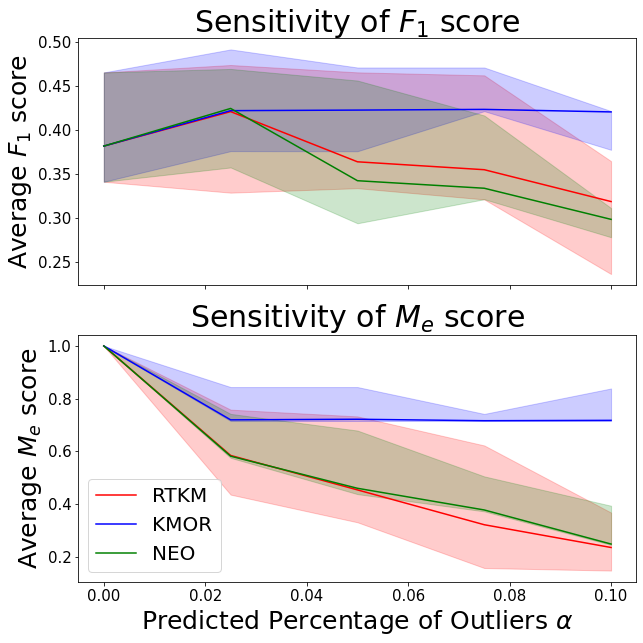

In [18]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (10,10))
ax1.plot(alpha_vals, f1_avg_rtkm, label = 'RTKM', c = 'r')
ax1.plot(alpha_vals, f1_avg_kmor, label = 'KMOR', c = 'b')
ax1.plot(alpha_vals, f1_avg_neo, label = 'NEO', c = 'g')
ax1.fill_between(alpha_vals, min_rtkm[0,:], max_rtkm[0,:], color = 'r', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor[0,:], max_kmor[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_neo[0,:], max_neo[0,:], color = 'g', alpha = 0.2)
ax1.set_title('Sensitivity of $F_1$ score')
ax1.set_ylabel('Average $F_1$ score')
ax1.yaxis.label.set_fontsize(25)
ax1.title.set_fontsize(30)
ax1.tick_params(axis='y', labelsize=15)
# ax1.legend()

ax2.plot(alpha_vals, me_avg_rtkm, label = 'RTKM', c = 'r')
ax2.plot(alpha_vals, me_avg_kmor, label = 'KMOR', c = 'b')
ax2.plot(alpha_vals, me_avg_neo, label = 'NEO', c = 'g')
ax2.fill_between(alpha_vals, min_rtkm[1,:], max_rtkm[1,:], color = 'r', alpha = 0.2)
ax2.fill_between(alpha_vals, min_kmor[1,:], max_kmor[1,:], color = 'b', alpha = 0.2)
ax2.fill_between(alpha_vals, min_neo[1,:], max_neo[1,:], color = 'g', alpha = 0.2)
ax2.set_title('Sensitivity of $M_e$ score')
ax2.set_ylabel('Average $M_e$ score')
ax2.set_xlabel('Predicted Percentage of Outliers ' r'$\alpha$')
ax2.xaxis.label.set_fontsize(25)
ax2.yaxis.label.set_fontsize(25)
ax2.title.set_fontsize(30)
ax2.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.legend(fontsize = 20)
plt.savefig('Shuttle.pdf', format = 'pdf')

In [19]:
# np.save('figure_data/alpha_vals_shuttle_50.npy', alpha_vals)

# np.save('figure_data/Me_avg_RTKM2_50.npy', me_avg_rtkm)
# np.save('figure_data/Me_avg_KMOR2_50.npy', me_avg_kmor)
# np.save('figure_data/Me_avg_NEO2_50.npy', me_avg_neo)

# np.save('figure_data/f1_avg_RTKM2_50.npy', f1_avg_rtkm)
# np.save('figure_data/f1_avg_KMOR2_50.npy', f1_avg_kmor)
# np.save('figure_data/f1_avg_NEO2_50.npy', f1_avg_neo)

# np.save('figure_data/min_RTKM_shuttle2_50.npy', min_rtkm)
# np.save('figure_data/max_RTKM_shuttle2_50.npy', max_rtkm)

# np.save('figure_data/min_KMOR_shuttle2_50.npy', min_kmor)
# np.save('figure_data/max_KMOR_shuttle2_50.npy', max_kmor)

# np.save('figure_data/min_NEO_shuttle2_50.npy', min_neo)
# np.save('figure_data/max_NEO_shuttle2_50.npy', max_neo)

In [41]:
def make_clusters(center_std, point_var, cluster_num, dim, N):
    #param center_std is standard deviation of normal distribution of centers
    #param point_var is variance from center to points
    #param cluster_num is number of clusters 
    #param is dimension of points
    #param is total number of points 
    
    #output: data point coordinates, matrix of weights, vector of weights, centers

    centers= np.random.normal(0,center_std,(cluster_num,dim)) 

    #intialize size of points
    points = np.empty([1,dim])
    true_weights = np.empty([1,cluster_num])
    cluster_weights_vector = np.empty([1,1])

    #create all cluster points
    
    num_points_in_cluster = N//cluster_num #number of points in each cluster-- could later move inside for loop and 
    #make random number so each cluster has a random number of points -- same # of points in each cluster not realistic?
    
    for i in range(cluster_num):
        x, y= np.random.multivariate_normal(centers[i,:], np.eye(dim,dim)*point_var[i], num_points_in_cluster).T
        
        cluster_points = np.vstack((x,y)).T
        points = np.vstack((points,cluster_points)) #stack all points from all clusters
        
        #weights of points in cluster in matrix form 
        cluster_weights = np.zeros((num_points_in_cluster, cluster_num))
        cluster_weights[:,i] = 1
        true_weights = np.vstack((true_weights, cluster_weights))

        #weights of points in cluster in vector form
        cluster_weights_vector = np.vstack((cluster_weights_vector, np.ones((1,num_points_in_cluster)).T*i))
                   
    return points[1:,:], true_weights[1:,:], cluster_weights_vector[1:,0], centers




No handles with labels found to put in legend.


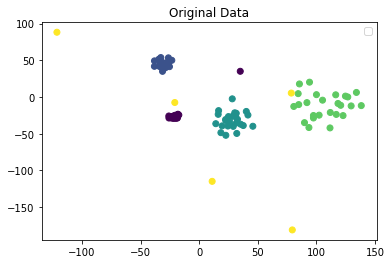

In [48]:
np.random.seed(104)

k = 4 #number of clusters
N = 100 #number of points
m = 2 #dimension of points
num_noise_points = 5

X, true_weights, cluster_weights_vector, true_centers = make_clusters(center_std = 50, point_var = [5,25,80,300], cluster_num = k, dim = m, N=N)
X = X.T

X[0,0] =35
X[1,0] = 35


X2 = np.random.normal(0,1,(2,num_noise_points))*100
outlierWeights = np.ones(num_noise_points)*4
cluster_weights_vector = np.hstack((cluster_weights_vector, outlierWeights))

X = np.hstack((X, X2))
m,N = np.shape(X)


plt.figure()
plt.scatter(X[0,:], X[1,:], c=cluster_weights_vector)
# plt.scatter(true_centers[:,0], true_centers[:,1], c = 'r')#, label= 'true centers')
#plt.scatter(init_centers[0,:], init_centers[1,:], c = 'b', label = 'initial centers')
plt.legend()
plt.title('Original Data')
plt.savefig('OrigDataKMeans')



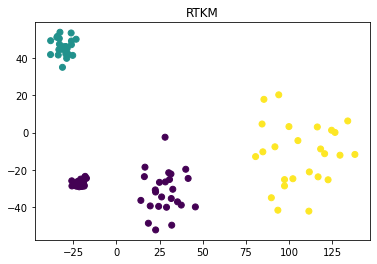

In [44]:
m,n = X.shape
RTKM_X = RTKM(X)
RTKM_X.perform_clustering(k=4, percent_outliers = 0.5, max_iter = 500, num_members = 1)

# weights = label_to_weight_mat(cluster_weights_vector, n, 4)

# tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = weights, pred_clusters = RTKM_X.weights, pred_outliers = RTKM_X.outliers, membership_option = 'single')

# print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
#       '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
#       '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
#      '\n\n me score: ', me)


# fin_clusters = RTKM_X.return_clusters()[0]

plt.figure()
plt.scatter(X[0,:], X[1,:], c=fin_clusters)
plt.title('RTKM')
plt.savefig('rtkm')







 Number of true positives:  [25, 25, 25, 23, 3] 

 Number of false positives :  [1, 0, 0, 1, 2] 

 Number of true negatives:  [79, 80, 80, 79, 98] 

 Number of false negatives:  [0, 0, 0, 2, 2] 

 F1 scores for each cluster:  [0.98039216 1.         1.         0.93877551 0.6       ] 

 Average F1 score:  0.9038335334133654 

 me score: 0.4004996878900158


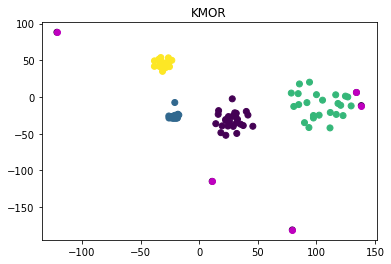

In [90]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(X, k=4, percent_outliers= 0.05, gamma = 1)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = weights, pred_clusters = pred_labels_KMOR, pred_outliers = pred_outliers_KMOR, membership_option = 'single')

labels = np.argmax(pred_labels_KMOR, axis = 0)

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

pred_outliers = np.where(pred_outliers_KMOR == 0)[0]
plt.figure()
plt.scatter(X[0,:], X[1,:], c = labels)
plt.scatter(X[0,pred_outliers], X[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
# plt.legend()
plt.title('KMOR')
plt.savefig('KMOR')




    _pyeval at line 57 column 30

***** iteration: 1, objective: 75688.693804
***** iteration: 2, objective: 32339.169206
***** iteration: 3, objective: 24592.855288
***** iteration: 4, objective: 24592.855288
***** No. of iterations done: 4
***** Total no. of data points: 105
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 3


 Number of true positives:  [25, 25, 25, 25, 3] 

 Number of false positives :  [1, 0, 0, 1, 0] 

 Number of true negatives:  [79, 80, 80, 79, 100] 

 Number of false negatives:  [0, 0, 0, 0, 2] 

 F1 scores for each cluster:  [0.98039216 1.         1.         0.98039216 0.75      ] 

 Average F1 score:  0.942156862745098 

 me score:  0.4


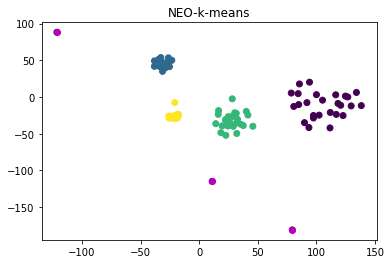

In [47]:
pred_labels_NEO, pred_outliers_NEO = run_neo(X, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=4, percent_outliers=0.03, sigma = 0, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = weights, pred_clusters = pred_labels_NEO, pred_outliers = pred_outliers_NEO, membership_option = 'single')


print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores), 
     '\n\n me score: ', me)


labels = np.argmax(pred_labels_NEO, axis = 0)

pred_outliers = np.where(pred_outliers_NEO == 0)[0]

plt.figure()
plt.scatter(X[0,:], X[1,:], c = labels)
plt.scatter(X[0,pred_outliers], X[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
# plt.legend()
# plt.title('NEO-k-means')
# plt.savefig('KMNOR')

7


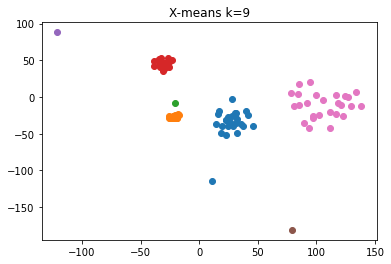

In [134]:
m,n = X.shape
k = 9

init_centers = X[:, np.random.choice(n, 1)]
xmeans_instance = xmeans(X.T, init_centers.T, k)
xmeans_instance.process()

clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

print(len(clusters))

plt.figure()
for cluster in clusters:
    plt.scatter(X[0,cluster], X[1,cluster])
plt.title('X-means k=9')
plt.savefig('X-means9')

# pred_labels = np.zeros(n)
# for i, cluster in enumerate(clusters):
#     pred_labels[cluster] = i
    
# weight_mat = label_to_weight_mat(pred_labels, n, 5)
# pred_outliers = weight_mat[-1]
# pred_outliers = np.where(pred_outliers==1, 0, 1)

# tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = weights, pred_clusters = weight_mat[:-1], pred_outliers = pred_outliers, membership_option = 'single')


# print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
#       '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
#       '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores), 
#      '\n\n me score: ', me)

8


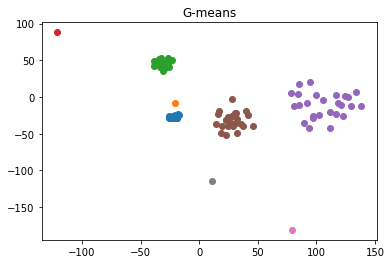

In [135]:
gmeans_instance = gmeans(X.T, repeat=10).process()
clusters = gmeans_instance.get_clusters()
centers = gmeans_instance.get_centers()

plt.figure()
for cluster in clusters:
    plt.scatter(X[0,cluster], X[1,cluster])
plt.title('G-means')
plt.savefig('gmeans')
    
print(len(centers))

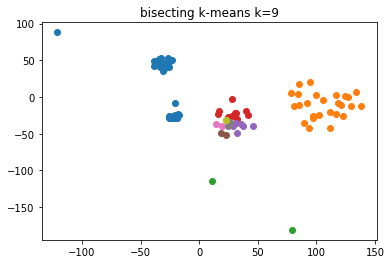

In [139]:
fin_labels = bisecting_k_means(X=X.T, k=9)

# weight_mat = label_to_weight_mat(fin_labels, n, 7)
# pred_outliers = weight_mat[-1]
# pred_outliers = np.where(pred_outliers==1, 0, 1)

plt.figure()
for label in np.unique(fin_labels):
    cluster = np.where(fin_labels == label)[0]
    plt.scatter(X[0,cluster], X[1,cluster])
plt.title('bisecting k-means k=9')
plt.savefig('bisectingk=9')
# tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_label, pred_clusters = weight_mat[:-1], pred_outliers = pred_outliers, membership_option = 'single')


# print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
#       '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
#       '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores), 
#      '\n\n me score: ', me)